In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import yfinance as yf

start = '2010-01-01'
end = '2022-12-31'

data = yf.download('AAPL', start = start, end = end)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00-05:00,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
2010-01-05 00:00:00-05:00,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06 00:00:00-05:00,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
2010-01-07 00:00:00-05:00,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08 00:00:00-05:00,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [3]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23 00:00:00-05:00,130.919998,132.419998,129.639999,131.860001,131.127060,63814900
2022-12-27 00:00:00-05:00,131.380005,131.410004,128.720001,130.029999,129.307236,69007800
2022-12-28 00:00:00-05:00,129.669998,131.029999,125.870003,126.040001,125.339409,85438400
2022-12-29 00:00:00-05:00,127.989998,130.479996,127.730003,129.610001,128.889572,75703700
2022-12-30 00:00:00-05:00,128.410004,129.949997,127.430000,129.929993,129.207779,77034200


In [4]:
data = data.reset_index()

In [5]:
data = data.drop(['Date', 'Adj Close'], axis = 1)

In [6]:
data

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3267,130.919998,132.419998,129.639999,131.860001,63814900
3268,131.380005,131.410004,128.720001,130.029999,69007800
3269,129.669998,131.029999,125.870003,126.040001,85438400
3270,127.989998,130.479996,127.730003,129.610001,75703700


In [7]:
ma100 = data.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

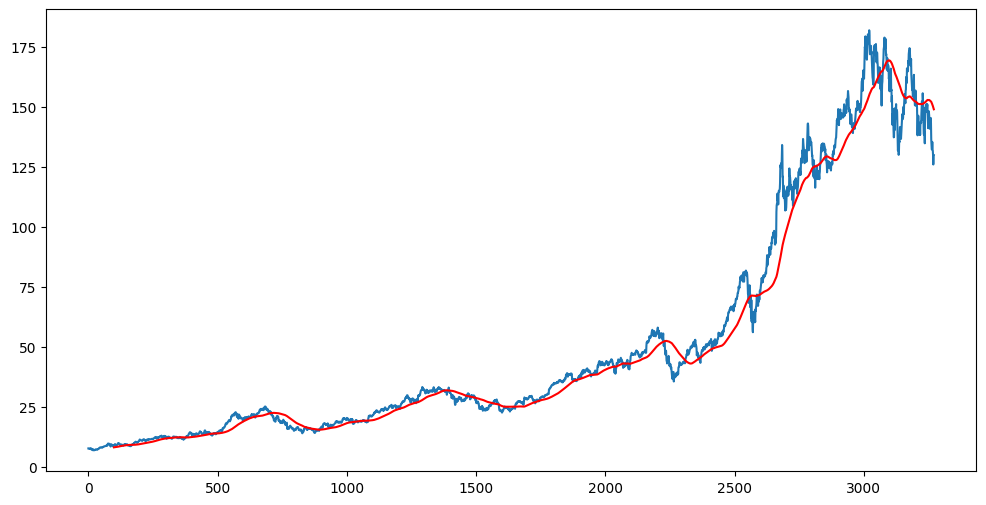

In [8]:
plt.figure(figsize = (12, 6))
plt.plot(data.Close)
plt.plot(ma100, 'r')

In [9]:
ma200 = data.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    152.1331
3268    152.0096
3269    151.8867
3270    151.7593
3271    151.6110
Name: Close, Length: 3272, dtype: float64

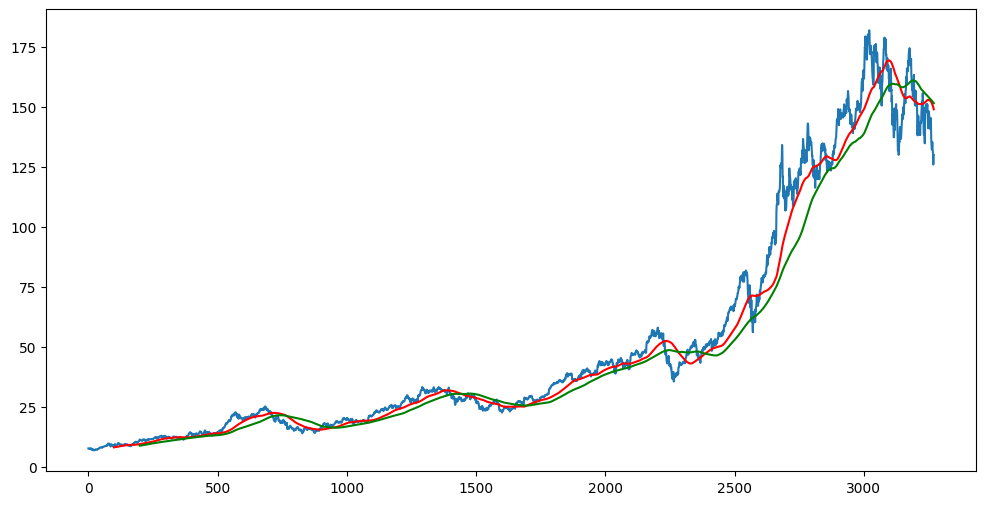

In [10]:
plt.figure(figsize = (12, 6))
plt.plot(data.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [11]:
data.shape

(3272, 5)

In [12]:
data_train = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_test = pd.DataFrame(data['Close'][int(len(data)*0.70):int(len(data))])

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [14]:
data_train_arr = scaler.fit_transform(data_train)

In [15]:
x_train = []
y_train = []

for i in range(100, data_train_arr.shape[0]):
    x_train.append(data_train_arr[i - 100 : i])
    y_train.append(data_train_arr[i, 0])

In [16]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
69/69 [==============================] - 42s 440ms/step - loss: 0.0318
Epoch 2/50
69/69 [==============================] - 25s 368ms/step - loss: 0.0066
Epoch 3/50
69/69 [==============================] - 26s 379ms/step - loss: 0.0063
Epoch 4/50
69/69 [==============================] - 26s 375ms/step - loss: 0.0058
Epoch 5/50
69/69 [==============================] - 25s 362ms/step - loss: 0.0057
Epoch 6/50
69/69 [==============================] - 26s 371ms/step - loss: 0.0054
Epoch 7/50
69/69 [==============================] - 25s 364ms/step - loss: 0.0051
Epoch 8/50
69/69 [==============================] - 26s 375ms/step - loss: 0.0050
Epoch 9/50
69/69 [==============================] - 27s 388ms/step - loss: 0.0041
Epoch 10/50
69/69 [==============================] - 26s 383ms/step - loss: 0.0045
Epoch 11/50
69/69 [==============================] - 30s 430ms/step - loss: 0.0044
Epoch 12/50
69/69 [==============================] - 31s 448ms/step - loss: 0.0035
Epoch 13/50
6

In [21]:
model.save('keras_model.h5')

C:\Users\Kshitij\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
data_test.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [23]:
data_train.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [24]:
past_100 = data_train.tail(100)

In [25]:
final_df = past_100.append(data_test, ignore_index = True)

C:\Users\Kshitij\AppData\Local\Temp\ipykernel_27460\461763425.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100.append(data_test, ignore_index = True)


In [29]:
final_df.head()

,Close
0,55.959999
1,54.470001
2,54.560001
3,54.592499
4,55.007500


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.13937014],
       [0.1291969 ],
       [0.1298114 ],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [31]:
input_data.shape

(1082, 1)

In [35]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [37]:
y_pred = model.predict(x_test)
y_pred.shape

31/31 [==============================] - 5s 120ms/step


(982, 1)

In [38]:
scaler.scale_

array([0.00682769])

In [39]:
scale_factor = 1/0.02099517
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

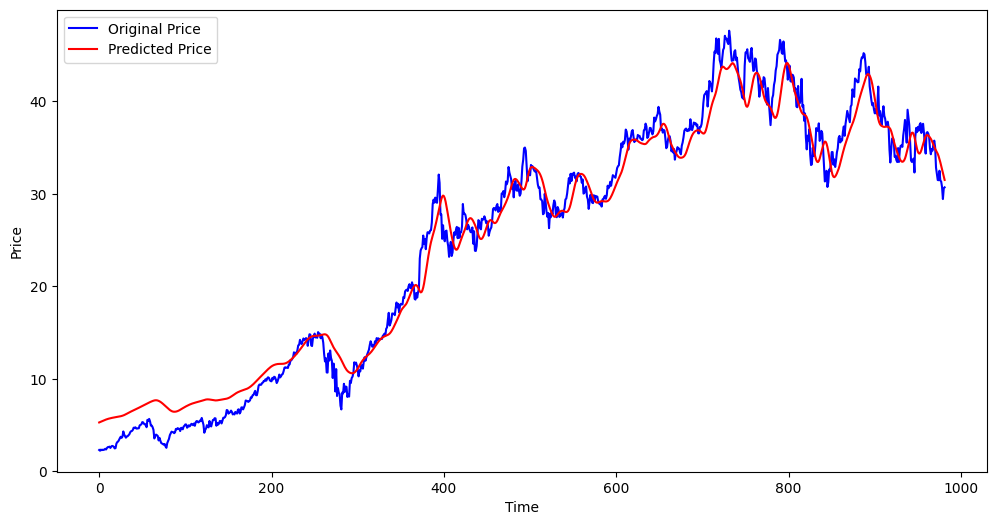

In [40]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()